In [7]:
setwd('/import/liujing/data2/')

In [8]:
load('ss.rda')

In [9]:
head(ss,3)

,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ZZZ3,5.730204,4.513456,4.749666,4.567165,5.057696,5.801109,4.799473,5.114276,4.936799,4.976465,...,6.115988,5.259859,4.917809,5.608466,4.913744,4.725205,5.182664,5.543549,4.964310,5.427400
ZZEF1,5.860012,6.369622,6.542447,6.365829,6.054136,6.277932,6.301297,6.172736,6.205374,6.118406,...,5.461108,6.281356,6.301789,6.128381,6.329689,6.536441,6.530182,6.441191,6.207649,5.907947
ZYX,7.380471,8.817062,9.740628,9.286642,8.356115,7.978896,9.183118,8.980222,9.279856,8.984216,...,6.310272,8.453717,8.901258,7.957986,9.115380,8.762740,8.834471,8.508191,8.762740,8.117364


In [4]:
head(group,2)

[1] "subtype1" "subtype1"

In [10]:
.libPaths(c('/root/miniconda3/envs/Rdoc/lib/R/library','/root/miniconda3/envs/metadoc/lib/R/library'))

In [11]:
library(HGNChelper)

Warning message:
"package 'HGNChelper' was built under R version 4.2.3"
Please cite our software :) 
 
 Sehyun Oh et al. HGNChelper: identification and correction of invalid gene symbols for human and mouse. F1000Research 2020, 9:1493. DOI: https://doi.org/10.12688/f1000research.28033.1 
 
 Type `citation('HGNChelper')` for a BibTeX entry.



In [12]:
mtx = ss

In [13]:
t <- checkGeneSymbols(rownames(mtx))
table(t$Approved)
table(is.na(t$Suggested.Symbol))
# delete <NA> and duplicated Suggested.Symbol
mtx$Suggested.Symbol <- t$Suggested.Symbol
mtx <- mtx[!is.na(mtx$Suggested.Symbol), ]
mtx <- mtx[!duplicated(mtx$Suggested.Symbol), ]
# delete multiple Suggested.Symbol
mtx <- mtx[!grepl("///", mtx$Suggested.Symbol), ]
# reset rownames
rownames(mtx) <- mtx$Suggested.Symbol
# delete Suggested.Symbol columns
mtx <- subset(mtx, select = -c(Suggested.Symbol))
dim(mtx)

Maps last updated on: Fri May 17 15:09:37 2024

Warning message in checkGeneSymbols(rownames(mtx)):
"Human gene symbols should be all upper-case except for the 'orf' in open reading frames. The case of some letters was corrected."
Warning message in checkGeneSymbols(rownames(mtx)):
"x contains non-approved gene symbols"



FALSE  TRUE 
 9011 21972 


FALSE  TRUE 
23627  7356 

[1] 23537    43

In [14]:
dat = mtx
library('GSEABase')
library(GSVA)

Warning message:
"package 'GSEABase' was built under R version 4.2.2"
Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:dplyr':

    combine, intersect, setdiff, union


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, aperm, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.unsorted,
    lapply, mapply, match, mget, order, paste, pmax, pmax.int, pmin,
    pmin.int, rank, rbind, rownames, sapply, setdiff, sort, table,
    tapply, union, unique, unsplit, which.max, which.min


Loading required package: Biobase

Warning message:
"package 'Biobase' was built under R version 4.2.3"
Welcome to Bioconductor

    Vignettes contain introductory material; view with
    'browseVignettes()'. To c

In [17]:
#geneSets <- getGmt('h.all.v7.5.1.symbols.gmt')    ###下载的基因集
geneSets <- getGmt('BP.gmt')
GSVA_hall <- gsva(expr=as.matrix(dat), 
                  gset.idx.list=geneSets, 
                  mx.diff=T, # 数据为正态分布则T，双峰则F
                  kcdf="Gaussian", #CPM, RPKM, TPM数据就用默认值"Gaussian"， read count数据则为"Poisson"，
                  parallel.sz=14) # 并行线程数目
head(GSVA_hall)

Warning message in getGmt("BP.gmt"):
"2 record(s) contain duplicate ids: GOBP_CIRCULATORY_SYSTEM_DEVELOPMENT, GOBP_PROTEOLYSIS_INVOLVED_IN_PROTEIN_CATABOLIC_PROCESS"
Warning message:
"useNames = NA is deprecated. Instead, specify either useNames = TRUE or useNames = TRUE."
Warning message in .filterFeatures(expr, method):
"1762 genes with constant expression values throuhgout the samples."
Warning message in .filterFeatures(expr, method):
"Since argument method!="ssgsea", genes with constant expression values are discarded."
Warning message in .gsva(expr, mapped.gset.idx.list, method, kcdf, rnaseq, abs.ranking, :
"Some gene sets have size one. Consider setting 'min.sz > 1'."


Setting parallel calculations through a MulticoreParam back-end
with workers=14 and tasks=100.
Estimating GSVA scores for 7646 gene sets.
Estimating ECDFs with Gaussian kernels
Estimating ECDFs in parallel on 14 cores


iteration: 
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100




  |======================================================================| 100%



,CI10,CI11,CI12,CI13,CI14,CI15,CI16,CI17,CI18,CI19,...,CI41,CI42,CI43,CI44,CI4,CI5,CI6,CI7,CI8,CI9
GOBP_10_FORMYLTETRAHYDROFOLATE_METABOLIC_PROCESS,0.21540634,0.20356242,-0.622000593,-0.6293748,-0.05851367,0.1227872,-0.333392435,-0.4697096,0.4396615,0.205889108,...,0.71381946,0.33751875,-0.15494511,0.47034569,-0.3791444,-0.31156016,-0.0002277452,0.44914633,0.32771443,-0.1820721
GOBP_2FE_2S_CLUSTER_ASSEMBLY,0.29904725,-0.20217840,0.005180149,-0.3817800,-0.24894756,0.2927718,-0.285534459,-0.1103111,0.3458170,-0.447132206,...,0.52590259,0.31908718,-0.14308304,0.36609232,-0.3962006,-0.03715715,0.4329224860,0.53212467,-0.44766319,-0.4699224
GOBP_2_OXOGLUTARATE_METABOLIC_PROCESS,-0.01720574,0.46925101,-0.053838198,-0.5995697,-0.26628179,0.2576695,0.002395076,0.2254516,0.1444350,-0.007554448,...,-0.19018920,-0.07947372,-0.06746428,0.19199967,-0.2359850,0.10020731,0.3651397944,0.37271557,0.41796594,-0.3146915
GOBP_3_PHOSPHOADENOSINE_5_PHOSPHOSULFATE_METABOLIC_PROCESS,-0.11426349,0.45918836,0.233133035,0.2516424,-0.26432418,-0.2532084,0.172702794,-0.2533670,0.3449373,0.041469256,...,-0.03418092,0.24420318,0.39918952,-0.43342420,0.2899200,0.45128201,0.0179263533,-0.12345430,-0.02937592,0.1213250
GOBP_3_UTR_MEDIATED_MRNA_DESTABILIZATION,-0.22617679,-0.21646661,0.145721700,-0.2146657,0.20843610,-0.1544612,-0.162006952,0.4014474,-0.2827833,0.400062735,...,-0.40247049,-0.41224831,-0.34544641,-0.02405906,0.3583144,0.36904347,-0.1159132927,-0.21741148,0.39673827,0.1278940
GOBP_3_UTR_MEDIATED_MRNA_STABILIZATION,-0.34382008,-0.01396721,0.071784794,0.1747401,-0.34765653,-0.2529241,-0.149530016,0.1233782,0.2066880,-0.016568231,...,-0.13501722,-0.14270977,0.02914473,-0.03929732,0.3355848,0.16202461,0.1809044730,0.06526055,0.05849860,-0.4109623


In [18]:
group

[1] "subtype1" "subtype1" "subtype1" "subtype1" "subtype2" "subtype2"
 [7] "subtype1" "subtype1" "subtype1" "subtype1" "subtype2" "subtype1"
[13] "subtype1" "subtype1" "subtype1" "subtype2" "subtype1" "subtype2"
[19] "subtype1" "subtype1" "subtype1" "subtype1" "subtype1" "subtype1"
[25] "subtype2" "subtype1" "subtype2" "subtype1" "subtype1" "subtype1"
[31] "subtype1" "subtype1" "subtype1" "subtype1" "subtype2" "subtype1"
[37] "subtype1" "subtype1" "subtype1" "subtype2" "subtype1" "subtype2"
[43] "subtype2"

In [19]:
## limma
#BiocManager::install('limma')
library(limma)
# 设置或导入分组
group <- factor(group, levels = c('subtype2','subtype1'))
design <- model.matrix(~0+group)

Warning message:
"package 'limma' was built under R version 4.2.3"

Attaching package: 'limma'


The following object is masked from 'package:BiocGenerics':

    plotMA




In [45]:

colnames(design) = levels(factor(group))
rownames(design) = colnames(GSVA_hall)
design
# Tunor VS Normal
compare <- makeContrasts('subtype2 - subtype1', levels=design)
fit <- lmFit(GSVA_hall, design)
fit2 <- contrasts.fit(fit, compare)
fit3 <- eBayes(fit2)
Diff <- topTable(fit3, coef=1, number=Inf)


,subtype2,subtype1
CI10,0,1
CI11,0,1
CI12,0,1
CI13,0,1
CI14,1,0
CI15,1,0
CI16,0,1
CI17,0,1
CI18,0,1
CI19,0,1


In [51]:
  Diff %>% dplyr::filter(P.Value < 0.05 & logFC > 0) %>%   dim()

[1] 191   6

In [52]:
  Diff %>% dplyr::filter(P.Value < 0.05 & logFC  <0) %>%   dim()

[1] 758   6

In [33]:
Diff = Diff %>%  dplyr::filter(abs(logFC) >0.4)

In [35]:
## barplot
dat_plot <- data.frame(id = row.names(Diff),
                       t = Diff$t)
# 去掉"HALLMARK_"
library(stringr)

In [36]:
library(ggplot2)
library(ggprism)

[1] "GOBP_POSITIVE_REGULATION_OF_CAMP_DEPENDENT_PROTEIN_KINASE_ACTIVITY"                                
 [2] "GOBP_MICROGLIAL_CELL_PROLIFERATION"                                                                
 [3] "GOBP_NITRIC_OXIDE_TRANSPORT"                                                                       
 [4] "GOBP_NEGATIVE_REGULATION_OF_PLATELET_AGGREGATION"                                                  
 [5] "GOBP_EPOXIDE_METABOLIC_PROCESS"                                                                    
 [6] "GOBP_NEGATIVE_REGULATION_OF_HOMOTYPIC_CELL_CELL_ADHESION"                                          
 [7] "GOBP_PEPTIDYL_LYSINE_OXIDATION"                                                                    
 [8] "GOBP_NEGATIVE_REGULATION_OF_BROWN_FAT_CELL_DIFFERENTIATION"                                        
 [9] "GOBP_FC_RECEPTOR_MEDIATED_INHIBITORY_SIGNALING_PATHWAY"                                            
[10] "GOBP_REGULATION_OF_MEMBRANE_REPOLARIZATION_DURING_VENTRICULAR_CARDIAC_MUSCLE_CELL_ACTION_POTENTIAL"

[1] "POSITIVE_REGULATION_OF_CAMP_DEPENDENT_PROTEIN_KINASE_ACTIVITY"                                
 [2] "MICROGLIAL_CELL_PROLIFERATION"                                                                
 [3] "NITRIC_OXIDE_TRANSPORT"                                                                       
 [4] "NEGATIVE_REGULATION_OF_PLATELET_AGGREGATION"                                                  
 [5] "EPOXIDE_METABOLIC_PROCESS"                                                                    
 [6] "NEGATIVE_REGULATION_OF_HOMOTYPIC_CELL_CELL_ADHESION"                                          
 [7] "PEPTIDYL_LYSINE_OXIDATION"                                                                    
 [8] "NEGATIVE_REGULATION_OF_BROWN_FAT_CELL_DIFFERENTIATION"                                        
 [9] "FC_RECEPTOR_MEDIATED_INHIBITORY_SIGNALING_PATHWAY"                                            
[10] "REGULATION_OF_MEMBRANE_REPOLARIZATION_DURING_VENTRICULAR_CARDIAC_MUSCLE_CELL_ACTION_POTENTIAL"


  Up Down  Not 
   2   10    0 

Warning message in plot_theme(plot):
"The `legend.text.align` theme element is not defined in the element hierarchy."
Warning message in plot_theme(plot):
"The `legend.title.align` theme element is not defined in the element hierarchy."


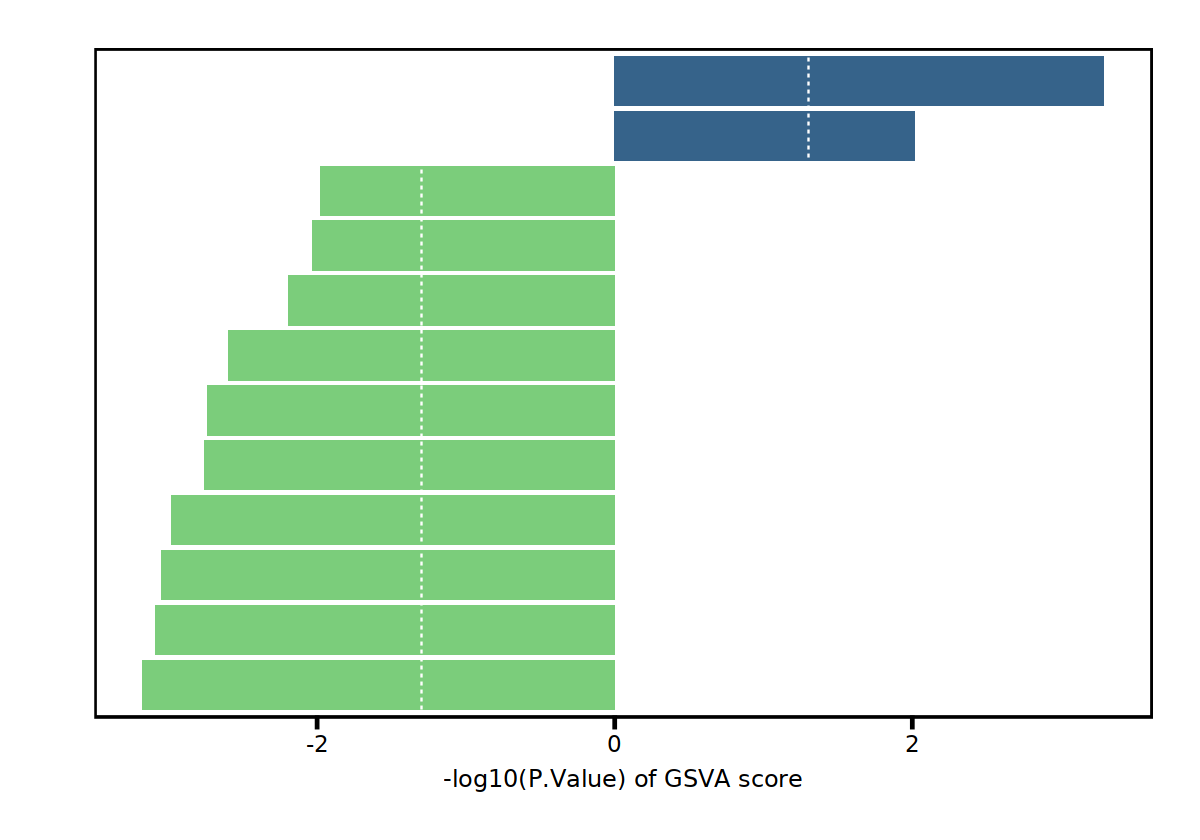

In [41]:
dat_plot <- data.frame(id  = row.names(Diff),
                       p   = Diff$P.Value,
                       lgfc= Diff$logFC)
dat_plot$group <- ifelse(dat_plot$lgfc>0 ,1,-1)    # 将上调设为组1，下调设为组-1
dat_plot$lg_p <- -log10(dat_plot$p)*dat_plot$group # 将上调-log10p设置为正，下调-log10p设置为负

# 去掉多余文字
dat_plot$id[1:10]
dat_plot$id <- str_replace(dat_plot$id, "GOBP_","");dat_plot$id[1:10]

# 根据阈值分类
p_cutoff=0.05
dat_plot$threshold <- factor(ifelse(abs(dat_plot$p) <= p_cutoff,
                                   ifelse(dat_plot$lgfc >0 ,'Up','Down'),'Not'),
                            levels=c('Up','Down','Not'))
table(dat_plot$threshold)

# 根据p从小到大排序
dat_plot <- dat_plot %>% arrange(lg_p)
# id变成因子类型
dat_plot$id <- factor(dat_plot$id,levels = dat_plot$id)
# 绘制条形图
p <- ggplot(data = dat_plot,aes(x = id, y = lg_p, 
                                fill = threshold)) +
  geom_col()+
  coord_flip() + #坐标轴旋转
  scale_fill_manual(values = c('Up'= '#36638a','Not'='#cccccc','Down'='#7bcd7b')) +
  geom_hline(yintercept = c(-log10(p_cutoff),log10(p_cutoff)),color = 'white',size = 0.5,lty='dashed') +
  xlab('') + 
  ylab('-log10(P.Value) of GSVA score') +
  guides(fill="none")+ # 不显示图例
  theme_prism(border = T) +
  theme(
    plot.margin=unit(c(2,2,2,2),'lines'),#图片四周上右下左间距
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
  )
p

In [42]:
low0 <- dat_plot %>% filter(lg_p < log10(p_cutoff)) %>% nrow()
# 小于0总数量
low1 <- dat_plot %>% filter(lg_p < 0) %>% nrow(); 
# 小于cutoff总数量
high0 <- dat_plot %>% filter(lg_p < -log10(p_cutoff)) %>% nrow(); high0 
# 总数量
high1 <- nrow(dat_plot); high1 

[1] 10

[1] 12

In [43]:
options(repr.plot.height = 7,repr.plot.width = 10)

Warning message in plot_theme(plot):
"The `legend.text.align` theme element is not defined in the element hierarchy."
Warning message in plot_theme(plot):
"The `legend.title.align` theme element is not defined in the element hierarchy."


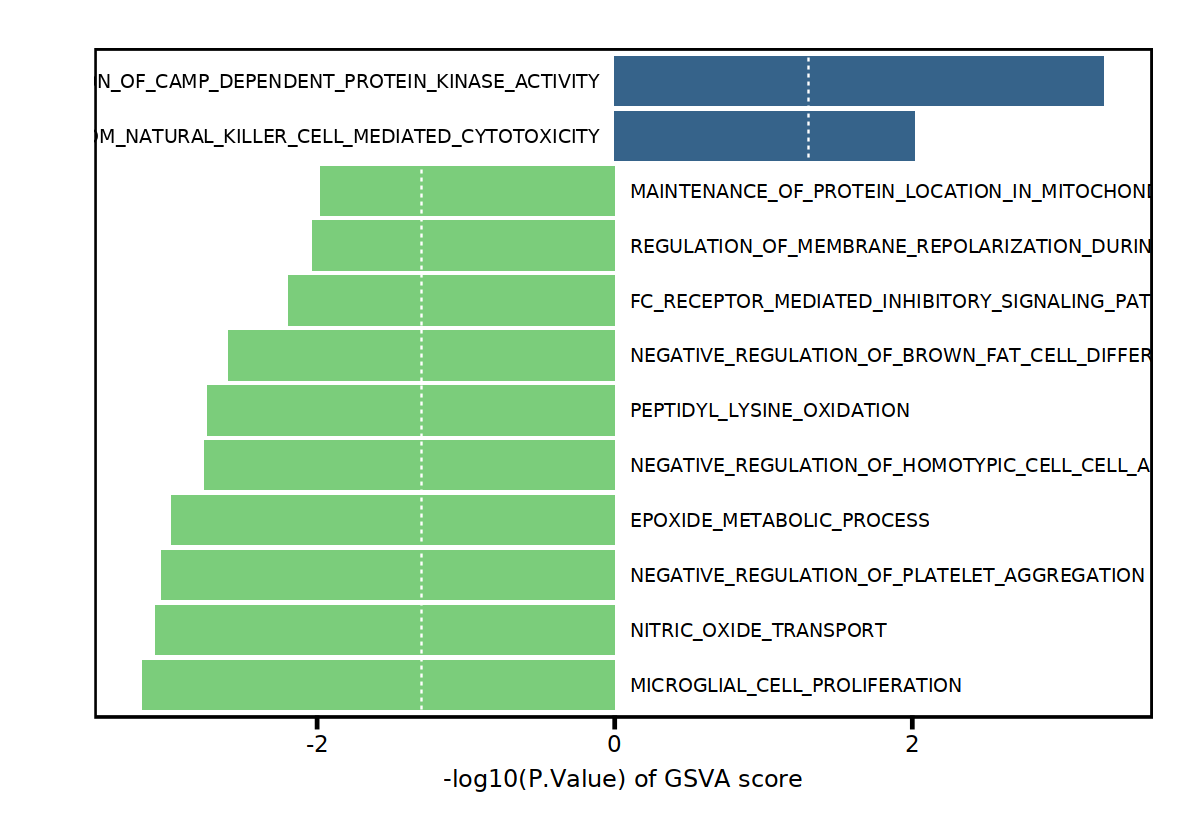

In [44]:


# 依次从下到上添加标签
p1 <- p + geom_text(data = dat_plot[1:low1,],aes(x = id,y = 0.1,label = id),
                   hjust = 0,color = 'black') + # 小于-cutoff的为黑色标签

  geom_text(data = dat_plot[(low1 +1):high1,],aes(x = id,y = -0.1,label = id),
            hjust = 1,color = 'black') # 大于cutoff的为黑色标签
p1